<a href="https://colab.research.google.com/github/Jakhongir0103/ML-DL_projects/blob/main/airplane_ticket_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train_data.csv", index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


#Data analysis

airline

In [3]:
df.airline.unique()

array(['Vistara', 'SpiceJet', 'Indigo', 'Air_India', 'GO_FIRST',
       'AirAsia'], dtype=object)

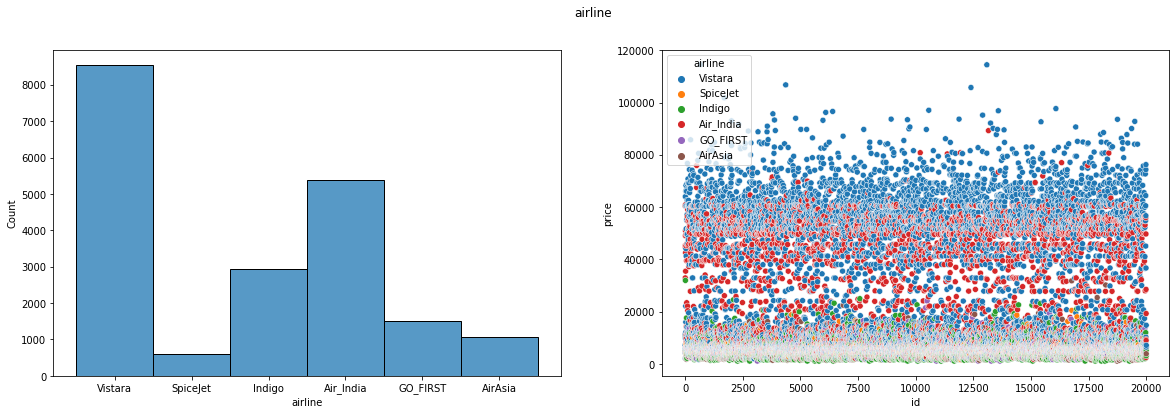

In [4]:
# Vistara tends to be more expencive, while Indigo seems to be cheaper
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('airline')
sns.histplot(ax=ax[0], data=df, x='airline')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='airline')
plt.show()

flight

In [5]:
print(len(df.flight.unique()))
df.flight.unique()

1310


array(['UK-810', 'SG-5094', 'UK-846', ..., 'AI-489', 'G8-213', '6E-7201'],
      dtype=object)

In [6]:
for a in df.airline.unique():
  print(df.groupby(['airline', 'flight']).count().loc[[a]].head(5).index)

MultiIndex([('Vistara', 'UK-613'),
            ('Vistara', 'UK-621'),
            ('Vistara', 'UK-627'),
            ('Vistara', 'UK-637'),
            ('Vistara', 'UK-651')],
           names=['airline', 'flight'])
MultiIndex([('SpiceJet', 'SG-1031'),
            ('SpiceJet', 'SG-1057'),
            ('SpiceJet', 'SG-1059'),
            ('SpiceJet', 'SG-1062'),
            ('SpiceJet', 'SG-1089')],
           names=['airline', 'flight'])
MultiIndex([('Indigo', '6E-102'),
            ('Indigo', '6E-113'),
            ('Indigo', '6E-121'),
            ('Indigo', '6E-126'),
            ('Indigo', '6E-128')],
           names=['airline', 'flight'])
MultiIndex([('Air_India', 'AI-401'),
            ('Air_India', 'AI-402'),
            ('Air_India', 'AI-403'),
            ('Air_India', 'AI-406'),
            ('Air_India', 'AI-407')],
           names=['airline', 'flight'])
MultiIndex([('GO_FIRST',  'G8-101'),
            ('GO_FIRST', 'G8-1010'),
            ('GO_FIRST',  'G8-102'),
          

In [7]:
# As we can see from above, flight numbers corresponds to the type of airline. 
# The best we can do is to group the flight numbers according to their starting letters. 
# But in this case they would convey the same info as the airline column does. So we just drop them.

source_city / destination_city

In [8]:
df.source_city.unique()

array(['Bangalore', 'Hyderabad', 'Kolkata', 'Chennai', 'Delhi', 'Mumbai'],
      dtype=object)

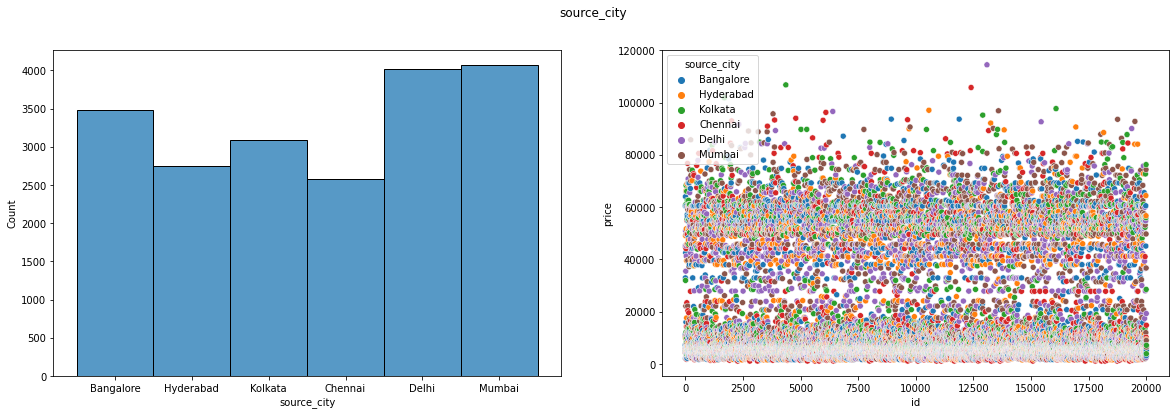

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('source_city')
sns.histplot(ax=ax[0], data=df, x='source_city')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='source_city')
plt.show()

In [10]:
df.destination_city.unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Hyderabad', 'Chennai', 'Bangalore'],
      dtype=object)

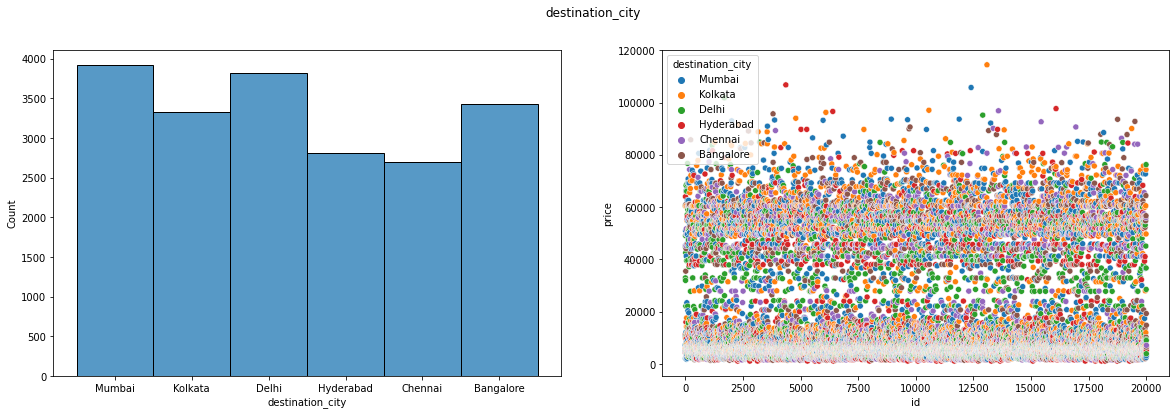

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('destination_city')
sns.histplot(ax=ax[0], data=df, x='destination_city')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='destination_city')
plt.show()

In [12]:
# As we see from above, Source and Destination cities alone don't have a noticable relation with the price, 
# So I will create a new column "src-dest" using them both.
# Because their combination corresponds with the length of the fligts, so their combination may give more info

departure_time / arrival_time

In [13]:
df.departure_time.unique()

array(['Early_Morning', 'Evening', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

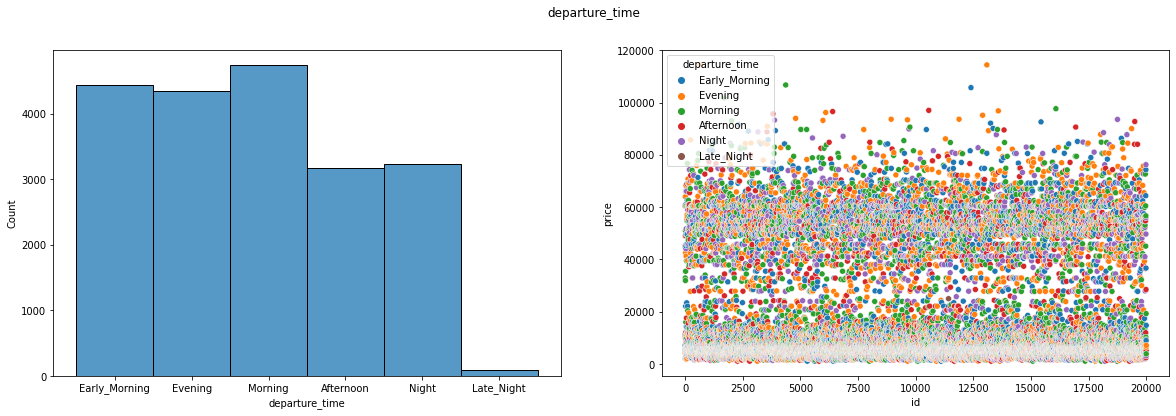

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('departure_time')
sns.histplot(ax=ax[0], data=df, x='departure_time')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='departure_time')
plt.show()

In [15]:
df.arrival_time.unique()

array(['Night', 'Evening', 'Morning', 'Afternoon', 'Early_Morning',
       'Late_Night'], dtype=object)

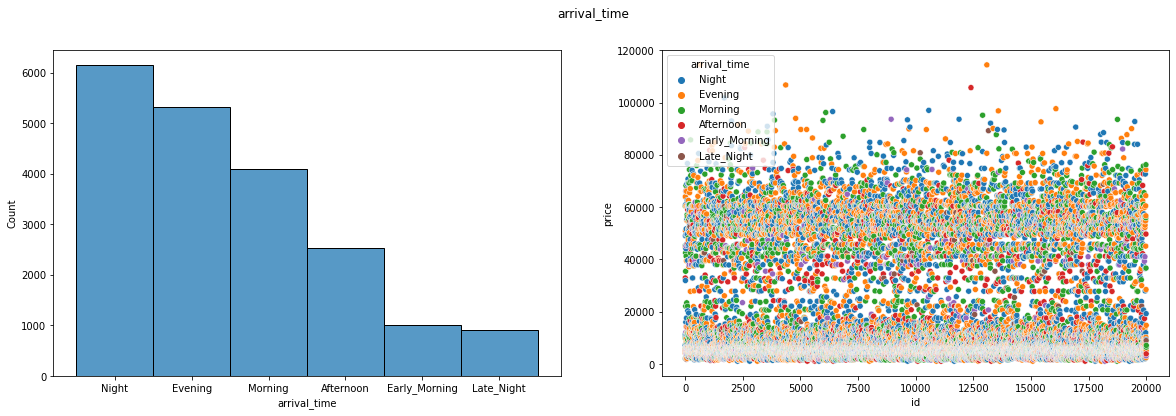

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('arrival_time')
sns.histplot(ax=ax[0], data=df, x='arrival_time')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='arrival_time')
plt.show()

In [17]:
# As we see from above, arrival and departure times alone don't have a noticable relation with the price, 
# So I will create a new column 'dep-arv' using them both. 
# Because their combination corresponds with the length of the fligts, so their combination may give more info

stops

In [18]:
df.stops.unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

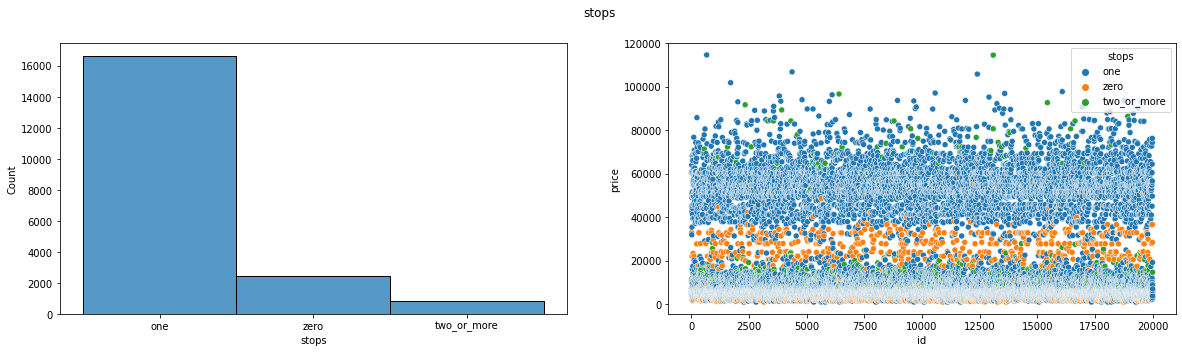

In [19]:
# the price of the flights with zero stops is, generally, less than 40000 rupees
fig, ax = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('stops')
sns.histplot(ax=ax[0], data=df, x='stops')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='stops')
plt.show()

class

In [20]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

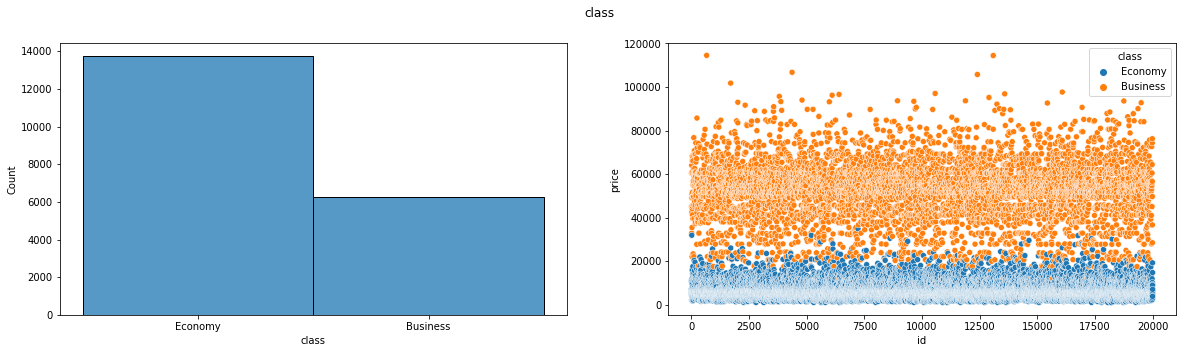

In [21]:
### we can relize that the borderline between economy and business class is around 20000 rupees
fig, ax = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('class')
sns.histplot(ax=ax[0], data=df, x='class')
sns.scatterplot(ax=ax[1], data=df, x=df.index, y='price', hue='class')
plt.show()

numerical columns

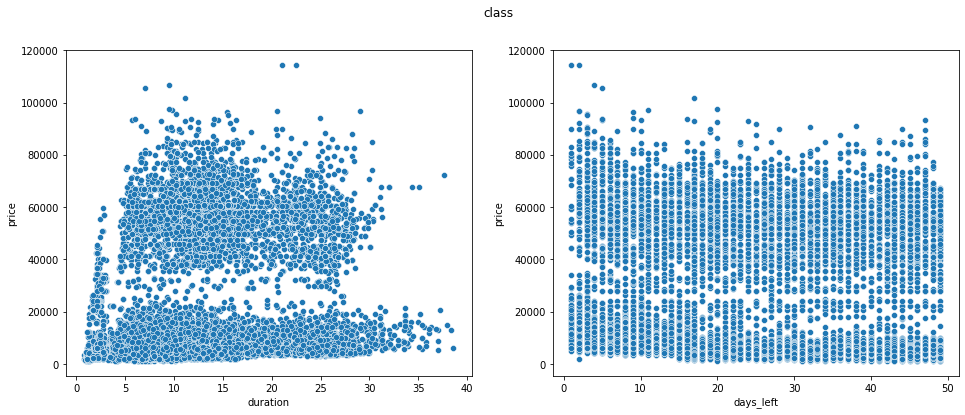

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle('class')
sns.scatterplot(ax=ax[0], data=df, x="duration", y="price")
sns.scatterplot(ax=ax[1], data=df, x="days_left", y="price")
plt.show()

In [23]:
df.corrwith(df.price)

duration     0.213158
days_left   -0.102545
price        1.000000
dtype: float64

In [24]:
# As we can see from above, the price column has little better relation with the column duration than days_left

# Data preparation for Modeling

In [25]:
y=df[['price']]
X=df.drop(columns='price')

X_num = X[['duration', 'days_left']]
X_cat = X.drop(columns=['duration', 'days_left'])

In [26]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['src-des'] = [f"{X.loc[i][self.columns[0]]}-{X.loc[i][self.columns[1]]}" for i in X.index]
        X['dep-arr'] = [f"{X.loc[i][self.columns[2]]}-{X.loc[i][self.columns[3]]}" for i in X.index]
        return X

In [27]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self, X, y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [28]:
cat_pipeline = Pipeline([
          ('attribs_adder', CombinedAttributesAdder(['source_city' ,'destination_city', 'departure_time' ,'arrival_time'])),
          ("column_dropper", columnDropperTransformer(['flight', 'source_city', 'destination_city', 'departure_time' ,'arrival_time'])),
          ('one_hot_encoder', OneHotEncoder())             
#          ('ord_encoder', OrdinalEncoder())             
])

num_attribs = list(X_num)
cat_attribs = list(X_cat)

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [29]:
X_transformed = full_pipeline.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Modeling

- X_train - train data features
- X_test - test data features
- y_train - train data labels
- y_test - test data labels

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Linear Regression

In [32]:
# Model training
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Model evaluation
y_pred = LR_model.predict(X_test)

# RMSE
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'rmse: {lin_rmse}')

# MAE
lin_mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {lin_mae}')

rmse: 6627.585934361985
mae: 4529.123769161041


Decision Tree Regressor

In [33]:
# Model training
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Model evaluation
y_pred = tree_model.predict(X_test)

# RMSE
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'rmse: {lin_rmse}')

# MAE
lin_mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {lin_mae}')

rmse: 4983.9351621861015
mae: 2287.10275


Random Forest Regressor

In [34]:
# Model training
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)

# Model evaluation
y_pred = RFR_model.predict(X_test)

# RMSE
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'rmse: {lin_rmse}')

# MAE
lin_mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {lin_mae}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


rmse: 3826.7684915679006
mae: 1972.533244345238


XGB Regressor

In [35]:
# Model training
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

# Model evaluation
y_pred = XGB_model.predict(X_test)

# RMSE
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'rmse: {lin_rmse}')

# MAE
lin_mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {lin_mae}')

[08:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse: 5003.841485704165
mae: 2955.0441548309327


# Save

In [36]:
df_test = pd.read_csv("test_data.csv", index_col=0)
df_test_transformed = full_pipeline.fit_transform(df_test)

In [37]:
price_pred = RFR_model.predict(df_test_transformed)
price_pred

array([56817.32, 55957.36, 22996.88, ..., 50092.36, 49563.78, 66564.76])

In [38]:
output = pd.DataFrame({'Id': df_test.index, 'price': price_pred})
output.to_csv('submission.csv', index=False)